In [1]:
import pandas as pd

In [2]:
X=pd.read_csv("E:\Jupyter_notebooks\data\secom.txt",sep = " ",header= None)#将txt文件以csv格式打开
y=pd.read_csv("E:\Jupyter_notebooks\data\secom_labels.txt",sep = " ",header= None)

In [3]:
X

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,-0.0045,...,0.0047,203.1720,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,-0.0061,...,NaN,NaN,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720
1564,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,NaN,NaN,...,0.0025,43.5231,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231
1565,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,-0.0072,...,0.0075,93.4941,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941


In [4]:
y

,0,1
0,-1,19/07/2008 11:55:00
1,-1,19/07/2008 12:32:00
2,1,19/07/2008 13:17:00
3,-1,19/07/2008 14:43:00
4,-1,19/07/2008 15:22:00
...,...,...
1562,-1,16/10/2008 15:13:00
1563,-1,16/10/2008 20:49:00
1564,-1,17/10/2008 05:26:00
1565,-1,17/10/2008 06:01:00


In [5]:
#将y中的数据标签取出
y=pd.DataFrame(y[0])
y

,0
0,-1
1,-1
2,1
3,-1
4,-1
...,...
1562,-1
1563,-1
1564,-1
1565,-1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


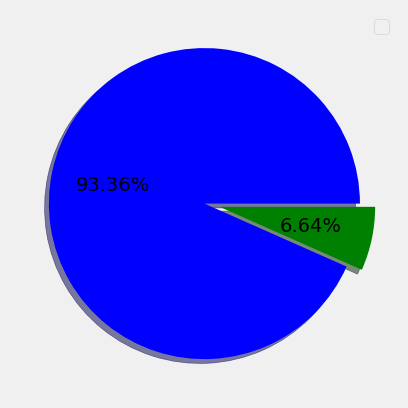

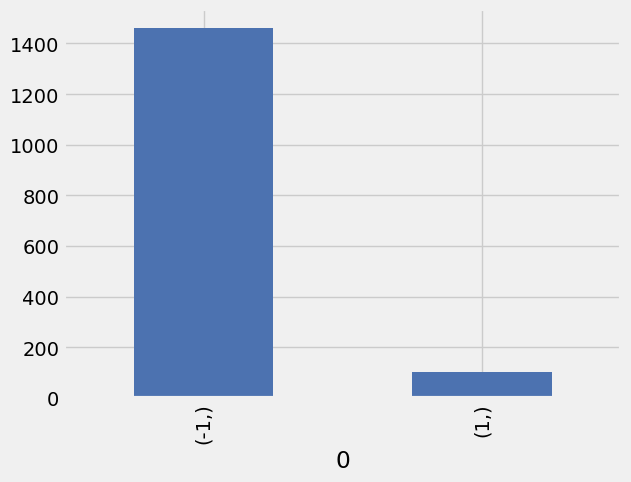

In [6]:
#查看数据的类别以及每个类别的占比
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# pie chart
# We have highly imbalanced class with only 6.6% failures and 93.4% pass


size = y.value_counts()
colors = ['blue', 'green']
explode = [0, 0.1]
plt.style.use('seaborn-deep')
# plt.rcParams['figure|.figsize'] = (8, 8)
plt.pie(size, colors = colors, explode = explode, autopct = "%.2f%%", shadow = True)
plt.axis('off')
plt.legend()
plt.show()
y.value_counts().plot(kind="bar");

由饼状图以及柱状图我们可以看到这是一个二分类数据集，而且这是一个不平衡数据集

In [7]:
#将标签-1/1变成1/0
#把标签变成0和1
y = y.replace(to_replace=1,value=0)
y = y.replace(to_replace=-1,value=1)

In [8]:
#将X和y合并，方面后续的处理
data=X.copy()
data[590]=y
data

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,590
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,0
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,-0.0045,...,203.1720,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,1
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,-0.0061,...,NaN,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,1
1564,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,NaN,NaN,...,43.5231,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,1
1565,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,-0.0072,...,93.4941,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,1


# 特征工程
## 数据预处理

In [9]:
#查看数据总体情况
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,590
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,...,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066,0.933631
std,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,0.015116,...,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919,0.249005
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,0.000000
25%,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,-0.010800,...,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600,1.000000
50%,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,-0.001300,...,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500,1.000000
75%,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,1.516900,0.008400,...,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700,1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800,1.000000


In [10]:
#处理缺失值
#删除缺失值大于百分之20的数据
columns=data.columns
remove=[]#创建一个空的list存放缺失值百分比对于0.2的特征的索引
for i in columns:#通过for循环寻找缺失值比例大于0.2的特征
    if data[i].isnull().mean()>0.2:
        remove.append(i)

data=data.drop(labels=remove,axis=1)#把缺失值比例大于0.2的特征删除

In [11]:
data.shape#还剩下558个特征

(1567, 559)

In [12]:
#剩下缺失值比例少的用平均值填补
import numpy as np

data = np.array(data)
data = data.astype(float)
for i in range(data.shape[1]):
       temp = np.array(data)[:, i].tolist()
       mean = np.nanmean(temp)
       data[np.argwhere(np.isnan(data[:, i].T)), i] = mean
data=pd.DataFrame(data)

In [13]:
# #剩下缺失值比例少的用零填补 
# import numpy as np

# data = np.array(data)
# data = data.astype(float)
# for i in range(data.shape[1]):
#        temp = np.array(data)[:, i].tolist()
#     #    mean = np.nanmean(temp)
#        data[np.argwhere(np.isnan(data[:, i].T)), i] = 0
# data=pd.DataFrame(data)

In [14]:
data.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
554    0
555    0
556    0
557    0
558    0
Length: 559, dtype: int64

In [15]:
#删除重复行
data.drop_duplicates()#0表示行不存在重复值
data.index=range(data.shape[0])#回复索引
data.shape#数据集没有变说明行行不存在重复值

(1567, 559)

数据的行数没有变说明数据集不存在重复行

In [16]:
#使用标准偏差，删除取值相同的列
data_std = data.std()#求出每一列的标准差
duplicate_features = data_std[data_std == 0].index#判断标准查是否为0，为0表示该列值全部相同
print('删除的特征数量为:',len(duplicate_features))
data = data.drop(labels=duplicate_features, axis=1)

删除的特征数量为: 116


In [17]:
#取出特征和标签
X=data.iloc[:,0:-1]
y=data.iloc[:,-1]

In [18]:
X1=X.copy()#进行特征选择的数据
X2=X.copy()#用于降维的数据
#目的是比较不同特征选择方式下模型的不同效果

## 特征选择

In [19]:
df_corr=abs(X1.corr())#使用相关性系数函数corr()求出特征之间的相关性系数并且使用abs()取绝对值

df_corr = pd.DataFrame(df_corr)

Featurei = []#存放需要删除的特征
Featurej = []#存放需要保留的特征
Corr = []

for i in df_corr.index:
    for j in df_corr.columns:
        if (df_corr.loc[i, j] > 0.8 and i != j):#比较两个特征之间的相关性系数，如果大于阈值且两个特征不是同一个特征，则删除其中一个特征
            if(i not in Featurei):
                Featurei.append(i)
            if(j not in Featurej):
                Featurej.append(j)
                Corr.append(df_corr.loc[i, j])
    
d = pd.DataFrame([Featurei, Featurej, Corr]).transpose()
display(d)#第0列为Featurei为删除的列，第1列为保留的列，第3列为两个特征之间的相关性系数

to_drop = set(d[0])

print('Number of features removed = ', len(to_drop))
    
X1=X1.drop(to_drop, axis=1)



,0,1,2
0,4.0,133.0,0.999975
1,16.0,261.0,0.999976
2,19.0,390.0,0.938416
3,25.0,140.0,0.885694
4,26.0,141.0,0.970294
...,...,...,...
317,551.0,552.0,0.994771
318,552.0,553.0,0.999890
319,553.0,551.0,0.994771
320,555.0,556.0,0.974276


Number of features removed =  322


In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF #导入查看方差膨胀因子的包variance_inflation_factor
vif = pd.DataFrame()
high_vif = []
vif['features'] = X1.columns
vif['VIF'] = [VIF(X1.values,i) for i in range(len(X1.columns))]

high_vif= vif[vif['VIF']>10].features#把vif大于10的特征放入high_vif中
print('Number of features with VIF > ',10,'= ',len(high_vif))
X1=X1.drop(high_vif,axis=1)

Number of features with VIF >  10 =  73


# 降维

In [21]:
#对原数据直接进行降维
from sklearn.decomposition import PCA#导入sklearn中将降维的包PCA
pca_line=PCA().fit(X2)
X_dr=pca_line.transform(X2)
X_dr.shape

(1567, 442)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


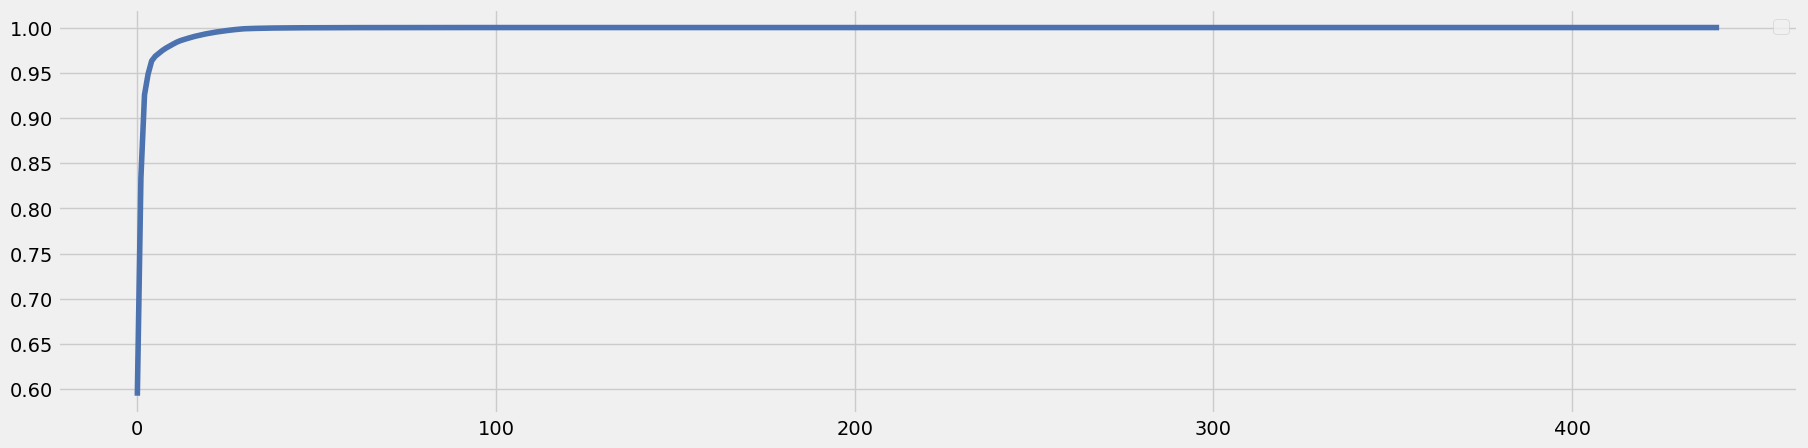

In [22]:
pca_line.explained_variance_ratio_
#画累计方差贡献率曲线，找最佳降维后维度的范围
plt.figure(figsize=[20,5])
plt.plot(np.cumsum(pca_line.explained_variance_ratio_))
plt.legend()
plt.show()

可以看到维度超过40时已经达到顶峰，可以把降维的维度选择为40

In [23]:
pca_line=PCA(40).fit(X2)#n_components="mle"是最大似然估计自选超参数，可以为我们自动选择最佳的降维维度
X_dr=pca_line.transform(X2)
X_dr.shape

(1567, 40)

In [24]:
X2=pd.DataFrame(X_dr)

In [25]:
#对于特征选择玩的数据进行降维，降维之后的数据为X3
#对原数据直接进行降维
from sklearn.decomposition import PCA
pca_line=PCA().fit(X1)#X1是之前特征选择完的数据
X_dr=pca_line.transform(X1)
X_dr.shape

(1567, 47)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


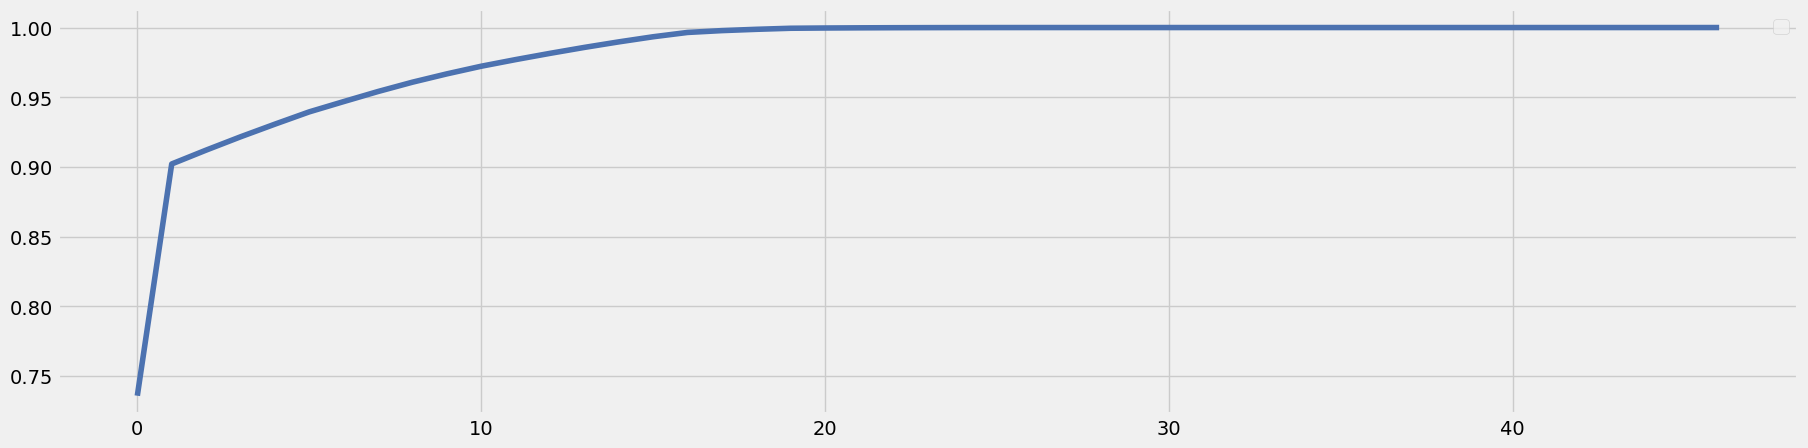

In [26]:
#对特征选择完的数据进行降维
pca_line.explained_variance_ratio_
#画累计方差贡献率曲线，找最佳降维后维度的范围
plt.figure(figsize=[20,5])
plt.plot(np.cumsum(pca_line.explained_variance_ratio_))
plt.legend()
plt.show()

In [36]:
#把降维的维度选择为20
pca_line=PCA(20).fit(X1)#X1是之前特征选择完的数据
X_dr=pca_line.transform(X1)
X_dr.shape

(1567, 20)

In [37]:
X3=X_dr#X3为即进行特征选择又进行降维的数据

# 建模

In [231]:
#划分测试集和训练集
from sklearn.model_selection import train_test_split 
Xtrain1,Xtest1,ytrain1,ytest1=train_test_split(X1,y,test_size=0.3,stratify = y,random_state=0)#只进行特征选择的数据
Xtrain2,Xtest2,ytrain2,ytest2=train_test_split(X2,y,test_size=0.3,stratify = y,random_state=0)#只进行降维的数据
Xtrain3,Xtest3,ytrain3,ytest3=train_test_split(X3,y,test_size=0.3,stratify = y,random_state=0)#进行特征选择和降维的数据

In [232]:
##数据集不平衡进行上采样
from imblearn.over_sampling import RandomOverSampler,SMOTE,ADASYN  
from imblearn.combine import SMOTETomek
sm=ADASYN(random_state=42)#实例化
X_somte1,y_somte1=sm.fit_resample(Xtrain1,ytrain1)#返回已经上采样完毕过后的特征矩阵和标签
X_somte2,y_somte2=sm.fit_resample(Xtrain2,ytrain2)
X_somte3,y_somte3=sm.fit_resample(Xtrain3,ytrain3)
n=X_somte1.shape[0]#样本数量
n1=pd.Series(y_somte1).value_counts()[1]#标签为1的样本数量
n0=pd.Series(y_somte1).value_counts()[0]#标签为0的样本数量
n1/n0

1.0058997050147493

In [233]:
def rcfClassifier(Xtrain,ytrain,Xtest,ytest):
#使用随机森林
    from sklearn.ensemble import RandomForestClassifier as rcf
    from sklearn.metrics import classification_report
    
    from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
    from sklearn.model_selection import cross_validate, cross_val_score, StratifiedKFold
    parameters = {
    'criterion':['gini','entropy'],
    'n_estimators': [10, 50, 100, 150, 200],
    'max_depth': range(1, 25),
    'min_samples_split':[5,10],
    'min_samples_leaf':[5,10]
    }
    #随机验证选取最佳参数
    rcf=RandomizedSearchCV(estimator=rcf(random_state=0),
                                param_distributions=parameters,
                                cv=StratifiedKFold(n_splits=10),
                                verbose=1,
                                n_iter=10,
                                random_state=10)

    rcf=rcf.fit(Xtrain,ytrain)

    predict_results=rcf.predict(Xtest)#测试集预测出来的标签
    print(classification_report(ytest,predict_results,digits=2))#打印模型评估报告

    from sklearn.metrics import roc_curve, auc
    import matplotlib.pyplot as plt
    #绘制ROC曲线
    fpr, tpr, thersholds = roc_curve(ytest, rcf.predict_proba(Xtest)[:,1],pos_label=1)
 
 
    roc_auc = auc(fpr, tpr)
 
    plt.plot(fpr, tpr, 'k--', label='ROC (area = {0:.2f})'.format(roc_auc), lw=2)
 
    plt.xlim([-0.05, 1.05])  # 设置x、y轴的上下限，以免和边缘重合，更好的观察图像的整体
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')  # 可以使用中文，但需要导入一些库即字体
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()


Fitting 10 folds for each of 10 candidates, totalling 100 fits
              precision    recall  f1-score   support

         0.0       0.11      0.13      0.12        31
         1.0       0.94      0.93      0.93       440

    accuracy                           0.87       471
   macro avg       0.52      0.53      0.53       471
weighted avg       0.88      0.87      0.88       471



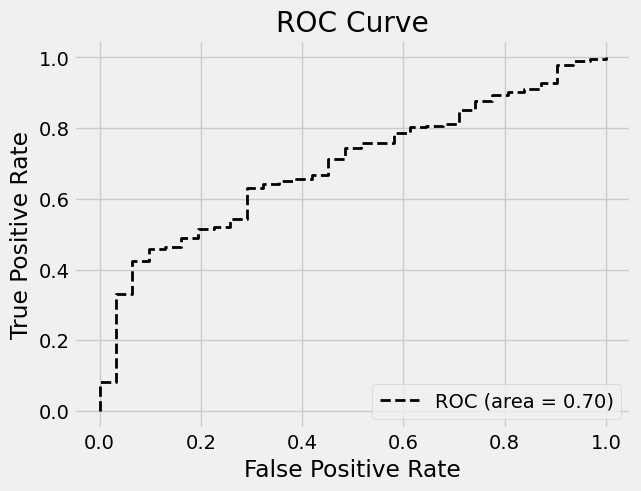

In [237]:
rcfClassifier(X_somte1,y_somte1,Xtest1,ytest1)#分类的数据集只使用特征选择

Fitting 10 folds for each of 10 candidates, totalling 100 fits
              precision    recall  f1-score   support

         0.0       0.03      0.03      0.03        31
         1.0       0.93      0.93      0.93       440

    accuracy                           0.87       471
   macro avg       0.48      0.48      0.48       471
weighted avg       0.87      0.87      0.87       471



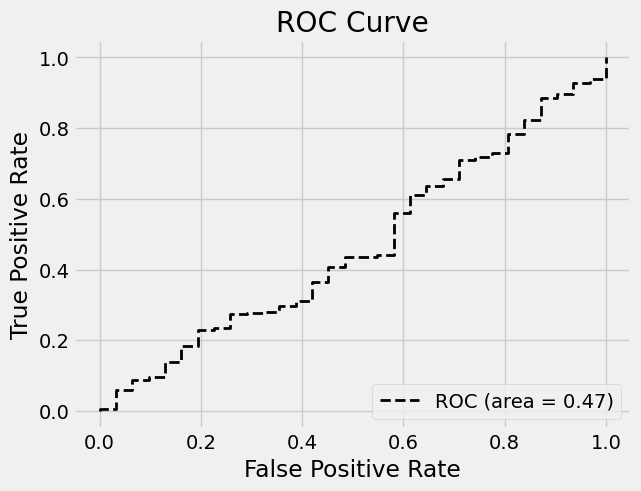

In [235]:
rcfClassifier(X_somte2,y_somte2,Xtest2,ytest2)#分类的数据集只使用降维

Fitting 10 folds for each of 10 candidates, totalling 100 fits
              precision    recall  f1-score   support

         0.0       0.06      0.26      0.09        31
         1.0       0.93      0.70      0.80       440

    accuracy                           0.68       471
   macro avg       0.49      0.48      0.45       471
weighted avg       0.87      0.68      0.76       471



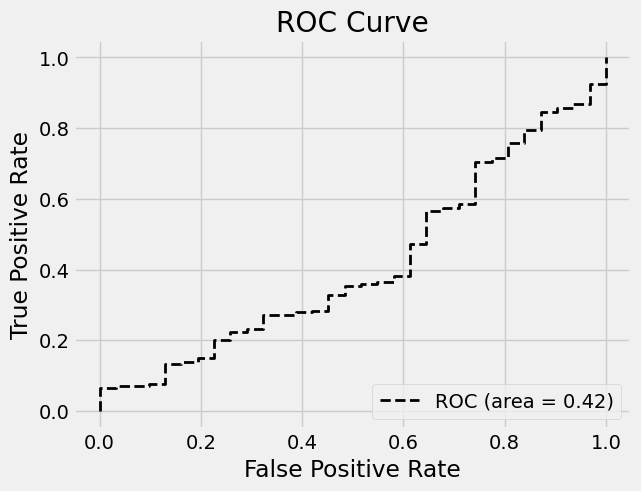

In [238]:
rcfClassifier(X_somte3,y_somte3,Xtest3,ytest3)#分类的数据集即使用降维又使用特征选择

# 聚类

In [29]:
#聚类之前先进行数据的标准化
from sklearn.preprocessing import scale# 数据标准化
x_scale=scale(X=X,with_mean=True,with_std=True,copy=True)#使用数据预处理完的数据,不进行特征选择和降维,不然会导致数据的缺失


In [34]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,adjusted_mutual_info_score,homogeneity_score,silhouette_score

estimator = KMeans(n_clusters=2)  # 构造聚类器
estimator.fit(x_scale)  # 聚类
label_pred = estimator.labels_#获取聚类标签

print(classification_report(y,label_pred,digits=2))#将聚类之后得到的标签和真实标签比较，打印模型评估报告

              precision    recall  f1-score   support

         0.0       0.07      0.99      0.12       104
         1.0       0.75      0.00      0.00      1463

    accuracy                           0.07      1567
   macro avg       0.41      0.50      0.06      1567
weighted avg       0.70      0.07      0.01      1567



e:\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
e:\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


tsne.embedding_: 
 [[-19.535715   -28.007402  ]
 [ 14.818699   -20.991943  ]
 [ 13.887245   -23.5236    ]
 ...
 [  0.5719635   -7.9345922 ]
 [-11.412942   -16.82228   ]
 [  0.75135344 -38.356678  ]]
tsne: 
 TSNE()


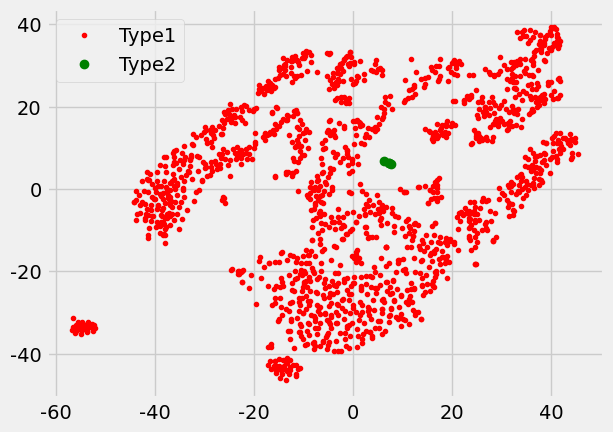

In [35]:
output_data = pd.concat([X, pd.Series(label_pred, index=X.index)], axis=1)   # 详细输出每个样本对应的类别
output_data.columns = list(X.columns) + ['Type']  # 重命名表头
# 使用TSNE进行数据降维并展示聚类结果
from sklearn.manifold import TSNE
tsne = TSNE()
tsne.fit_transform(X)  # 进行数据降维
# tsne.embedding_可以获得降维后的数据
print('tsne.embedding_: \n', tsne.embedding_)
tsn = pd.DataFrame(tsne.embedding_, index=X.index)  # 转换数据格式
print('tsne: \n', tsne)

import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 不同类别用不同颜色和样式绘图
color_style = ['r.', 'go', 'b*']
for i in range(2):
    d = tsn[output_data[u'Type'] == i]
    # dataframe格式的数据经过切片之后可以通过d[i]来得到第i列数据
    plt.plot(d[0], d[1], color_style[i], label='Type' + str(i+1))
plt.legend()
plt.show()